<a href="https://colab.research.google.com/github/Tanishqtarun/PRMLProject/blob/main/Bayesian_Classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Access the data
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [2]:
# Features (flattened 8x8 images)
X = digits.data

# Target labels (digits 0-9)
y = digits.target

In [3]:
import pandas as pd

# Load the CSV file (adjust the path if needed)
digits = pd.read_csv('/content/sample_data/mnist_test.csv')

# Inspect the first few rows of the dataset
print(digits.head())  # Shows the first 5 rows of the data to check structure

# Check the shape of the dataset
print(digits.shape)  # Should print (number of samples, number of features + 1 label column)

# Check the data types of columns
print(digits.dtypes)


   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
(9999, 785)
7        int64
0        int64
0.1      int64
0.2      int64
0.3      int64
         ...  
0.663    int64
0.664    int64
0.665    int64
0.666    int64
0.667    int64
Length: 785, dtype

Loading MNIST dataset...
Training Bernoulli Naive Bayes...
Bernoulli Naive Bayes Accuracy: 82.71%


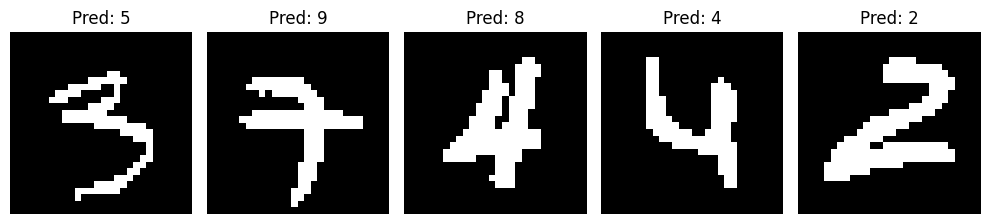

In [4]:
# bayesian classifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Step 1: Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target.astype(int)  # Normalize pixel values

# Step 2: Binarize the data (0 if pixel < 0.5 else 1)
X_bin = (X > 0.5).astype(int)

# Step 3: Reduce dataset size for faster training
X_sample, _, y_sample, _ = train_test_split(X_bin, y, train_size=12000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Step 4: Train Bernoulli Naive Bayes model
print("Training Bernoulli Naive Bayes...")
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Bernoulli Naive Bayes Accuracy: {accuracy * 100:.2f}%")

# Step 6: Visualize some predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {y_pred[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Make predictions on the test set using the trained KNN model (knn)
y_pred = bnb.predict(X_test)

# Round the predictions to the nearest integer (since we're predicting digits)
y_pred_rounded = [round(x) for x in y_pred]


In [7]:
from sklearn.metrics import accuracy_score

# Evaluate the model by comparing predicted and actual labels
accuracy = accuracy_score(y_test, y_pred_rounded)

print(f"Accuracy: {accuracy*100} %")


Accuracy: 82.70833333333333 %
